# 2.1 pratices knn model 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#load the data 
ds=pd.read_csv("Downloads/hearing_test.csv")
ds.head(10)

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1
5,58.0,23.0,0
6,66.0,28.9,0
7,38.0,41.1,1
8,53.0,32.0,0
9,43.0,41.5,1


In [3]:
ds.shape

(5000, 3)

In [4]:
ds.dtypes

age               float64
physical_score    float64
test_result         int64
dtype: object

In [5]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             5000 non-null   float64
 1   physical_score  5000 non-null   float64
 2   test_result     5000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 117.3 KB


In [6]:
ds.isnull().sum()

age               0
physical_score    0
test_result       0
dtype: int64

In [7]:
#eda
ds.describe()

,age,physical_score,test_result
count,5000.000000,5000.000000,5000.000000
mean,51.609000,32.760260,0.600000
std,11.287001,8.169802,0.489947
min,18.000000,-0.000000,0.000000
25%,43.000000,26.700000,0.000000
50%,51.000000,35.300000,1.000000
75%,60.000000,38.900000,1.000000
max,90.000000,50.000000,1.000000


C:\Users\Rohit Jain\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

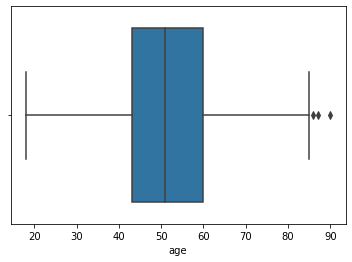

In [8]:
sns.boxplot("age",data=ds)

C:\Users\Rohit Jain\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='physical_score'>

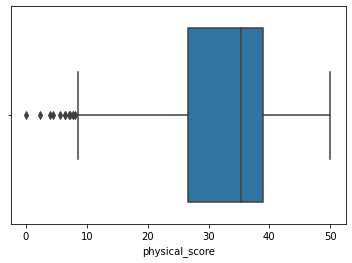

In [9]:
sns.boxplot("physical_score",data=ds)

In [10]:
from feature_engine.outliers import Winsorizer
win=Winsorizer(capping_method="iqr",tail="both",fold=1.5,variables=["age"])
d_win=win.fit_transform(ds[["age"]])
d_win

,age
0,33.0
1,50.0
2,52.0
3,56.0
4,35.0
...,...
4995,73.0
4996,57.0
4997,49.0
4998,38.0


In [11]:
print(win.left_tail_caps_,win.right_tail_caps_)

{'age': 17.5} {'age': 85.5}


<AxesSubplot:xlabel='age'>

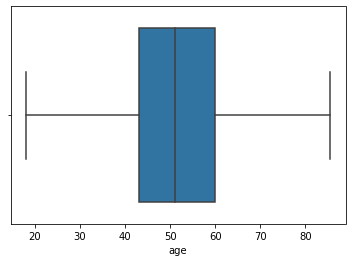

In [12]:
sns.boxplot(x=d_win["age"],data=ds)

In [13]:
from feature_engine.outliers import Winsorizer
win=Winsorizer(capping_method="iqr",tail="both",fold=1.5,variables=["physical_score"])
d_win=win.fit_transform(ds[["physical_score"]])
d_win

,physical_score
0,40.7
1,37.2
2,24.7
3,31.0
4,42.9
...,...
4995,8.4
4996,33.9
4997,34.5
4998,46.4


In [14]:
print(win.left_tail_caps_,win.right_tail_caps_)

{'physical_score': 8.399999999999999} {'physical_score': 57.20000000000001}


<AxesSubplot:xlabel='physical_score'>

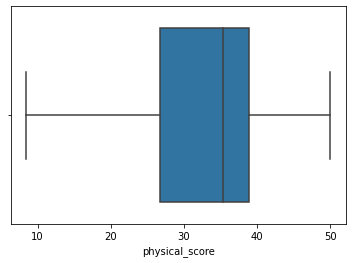

In [15]:
sns.boxplot(x=d_win["physical_score"],data=ds)

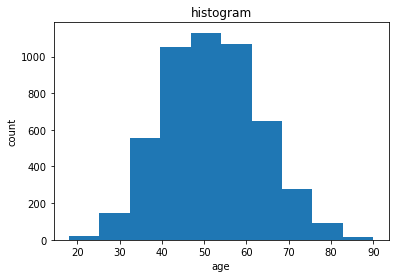

In [16]:
plt.hist(ds["age"])
plt.xlabel("age")
plt.ylabel("count")
plt.title("histogram")
plt.show()

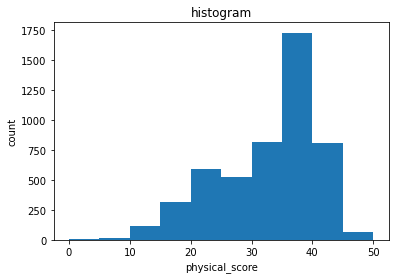

In [17]:
plt.hist(ds["physical_score"])
plt.xlabel("physical_score")
plt.ylabel("count")
plt.title("histogram")
plt.show()

In [18]:
ds["physical_score"].skew()

-0.7792816279520084

In [19]:
ds["age"].skew()

0.22094186437338537

In [20]:
ds["sk_physical_score"]=ds["physical_score"]**(3.1)
ds["sk_physical_score"].skew()

0.09086364994773004

In [21]:
ds["sk_age"]=ds["age"]**(0.5988988898629)
ds["sk_age"].skew()

0.004806267501465455

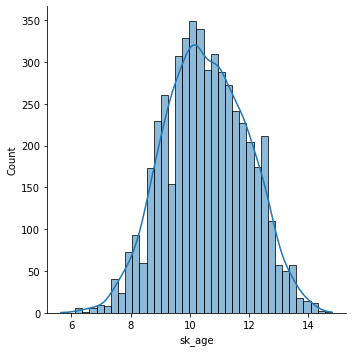

In [22]:
sns.displot(x="sk_age",data=ds,kde=True)

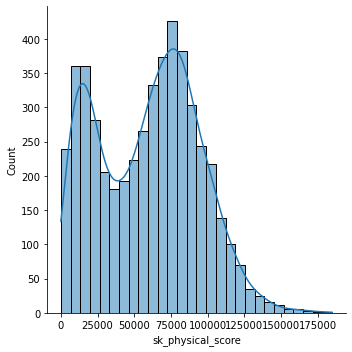

In [23]:
sns.displot(x="sk_physical_score",data=ds,kde=True)

<AxesSubplot:xlabel='age', ylabel='physical_score'>

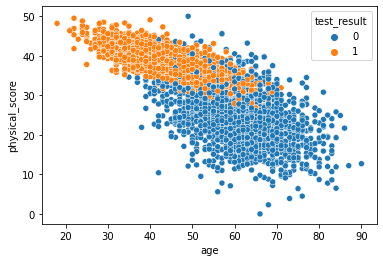

In [24]:
sns.scatterplot(x="age",y="physical_score",hue="test_result",data=ds)

In [25]:
#x and y 
x=ds.drop("test_result",axis=1)
y=ds["test_result"]

In [37]:
#train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=100)

In [38]:
#scaling 
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [39]:
#modeling 
from sklearn.neighbors import KNeighborsClassifier
knn_model= KNeighborsClassifier()
knn_model.fit(x_train,y_train)

KNeighborsClassifier()

In [40]:
train_yprediction=knn_model.predict(x_train)
test_yprediction=knn_model.predict(x_test)

In [41]:
#evalution
from sklearn.metrics import accuracy_score
print(accuracy_score(y_train,train_yprediction))
print(accuracy_score(y_test,test_yprediction))

0.94
0.9246666666666666


In [42]:
#cross validation
from sklearn.model_selection import cross_val_score
sc=cross_val_score(knn_model,x,y,cv=5)
print(sc)
sc.mean()

[0.915 0.9   0.903 0.902 0.912]


0.9064

In [43]:
#hyper paramerter 

from sklearn.model_selection import GridSearchCV

estimator=KNeighborsClassifier()

param_grid={"n_neighbors":list(range(1,31)),"p":[1,2]}
hypertvalue=GridSearchCV(estimator,param_grid,cv=5,scoring="accuracy")
hypertvalue.fit(x_train,y_train)


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30],
                         'p': [1, 2]},
             scoring='accuracy')

In [44]:
hypertvalue.best_params_

{'n_neighbors': 24, 'p': 2}

In [48]:
#rebuild the model with hyper tunning pareams
knn_model=KNeighborsClassifier(n_neighbors=24,p=2)
knn_model.fit(x_train,y_train)

train_yprediction=knn_model.predict(x_train)
test_yprediction=knn_model.predict(x_test)

print(accuracy_score(y_train,train_yprediction))
print(accuracy_score(y_test,test_yprediction))

0.9328571428571428
0.9246666666666666


In [46]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,test_yprediction)

array([[558,  76],
       [ 37, 829]], dtype=int64)

In [47]:
from sklearn.metrics import classification_report
print(classification_report(y_test,test_yprediction))

              precision    recall  f1-score   support

           0       0.94      0.88      0.91       634
           1       0.92      0.96      0.94       866

    accuracy                           0.92      1500
   macro avg       0.93      0.92      0.92      1500
weighted avg       0.93      0.92      0.92      1500

